<a href="https://colab.research.google.com/github/vishnu10j2/2303a510j2.AIML-17/blob/main/ASSIGNMENT-5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
90%     802.000000    1.000000    3.000000   50.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

         

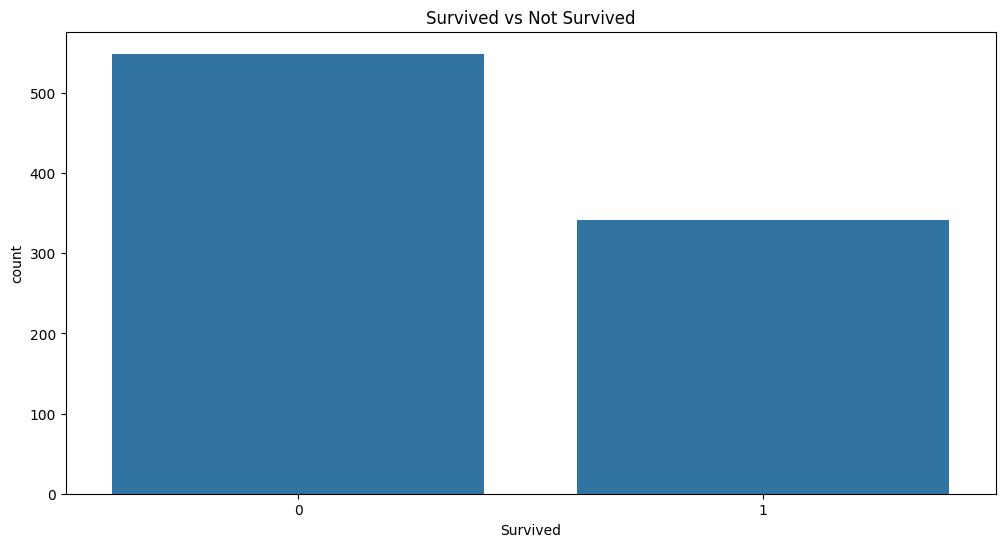

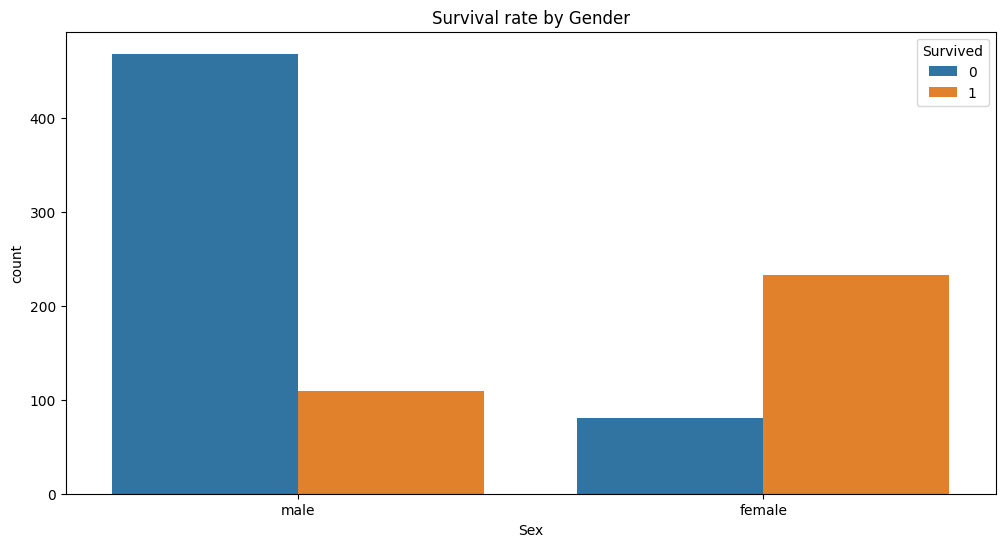

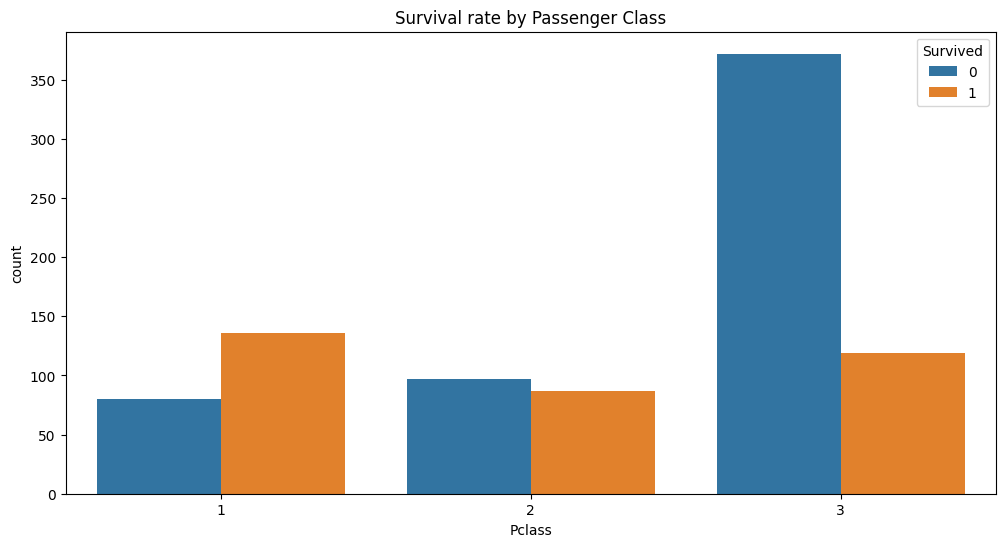

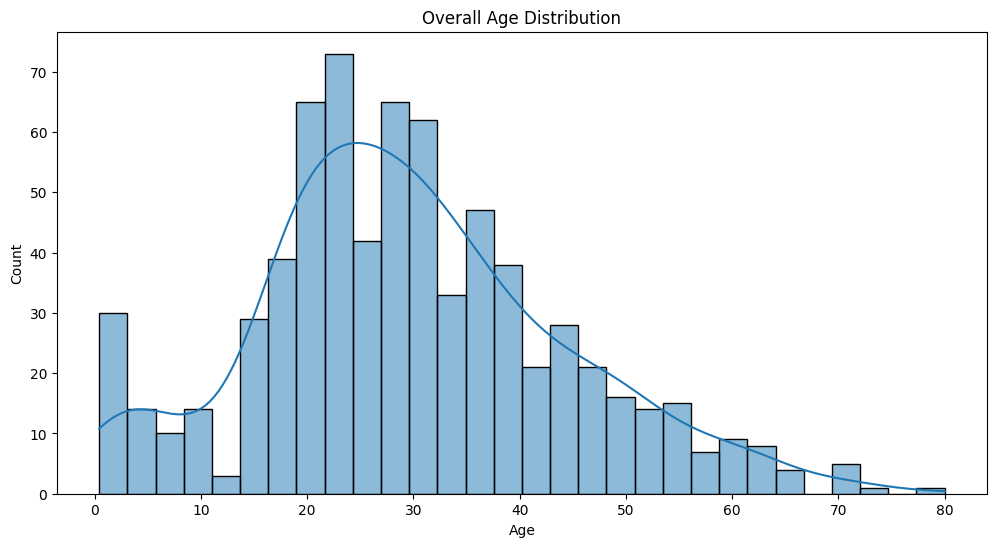

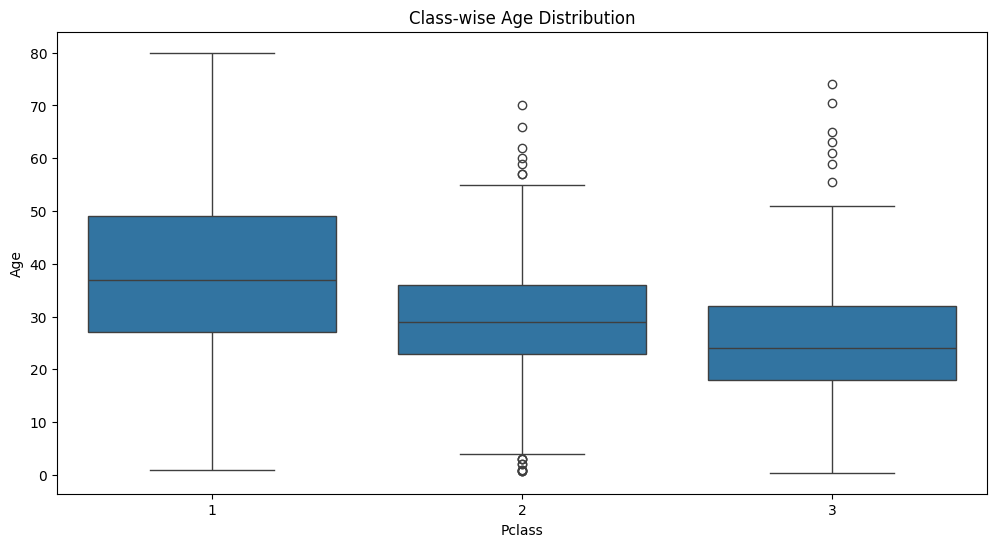

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1 Score: 0.7638888888888888


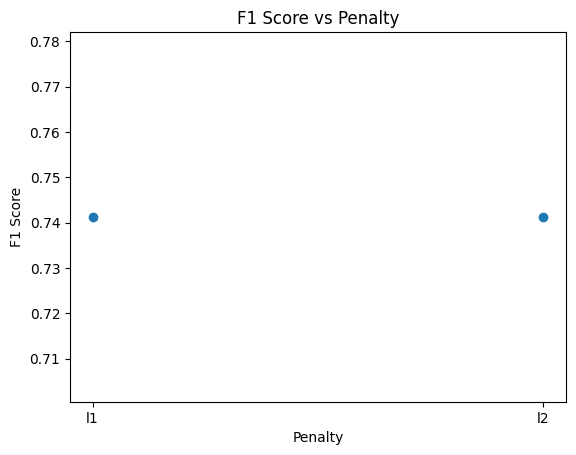

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score


titanic_df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')


print(titanic_df.dtypes)


summary = titanic_df.describe(percentiles=[.25, .5, .75, .9])
print(summary)


print(titanic_df.columns.tolist())


plt.figure(figsize=(12, 6))
sns.countplot(x='Survived', data=titanic_df)
plt.title('Survived vs Not Survived')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='Sex', hue='Survived', data=titanic_df)
plt.title('Survival rate by Gender')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='Pclass', hue='Survived', data=titanic_df)
plt.title('Survival rate by Passenger Class')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(titanic_df['Age'], bins=30, kde=True)
plt.title('Overall Age Distribution')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Pclass', y='Age', data=titanic_df)
plt.title('Class-wise Age Distribution')
plt.show()


mean_age = titanic_df['Age'].mean()
titanic_df['Age'].fillna(mean_age, inplace=True)

columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
titanic_df.drop(columns=columns_to_drop, inplace=True)

titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})
titanic_df['Embarked'] = titanic_df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})


titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)


X = titanic_df.drop('Survived', axis=1)
Y = titanic_df['Survived']


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


model = LogisticRegression()
model.fit(X_train, Y_train)


Y_pred = model.predict(X_test)


f1 = f1_score(Y_test, Y_pred)
print(f"F1 Score: {f1}")

penalties = ['l1', 'l2']
f1_scores = []

for penalty in penalties:
    model = LogisticRegression(penalty=penalty, solver='liblinear')
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    f1_scores.append(f1_score(Y_test, Y_pred))

plt.scatter(penalties, f1_scores)
plt.title('F1 Score vs Penalty')
plt.xlabel('Penalty')
plt.ylabel('F1 Score')
plt.show()